In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
# 1. Loading the Dataset

# Load the digits dataset
digits = load_digits()

In [18]:
# 2. Understanding the Data

# Convert the digits dataset to a DataFrame
data = pd.DataFrame(digits.data)
data['target'] = digits.target

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Get summary statistics
print(data.describe())


     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]
0         0
1         0
2         0
3         0
4         0
         ..
60        0
61        0
62        0
63        0
target    0
Length: 65, dtype: int64
            0            1            2            3            4  \
count  1797.

In [12]:
# Display basic information about the dataset
print("Digits dataset information:")
print("Number of samples:", len(digits.data))
print("Number of features:", len(digits.data[0]))
print("Number of classes:", len(set(digits.target)))

# Convert the dataset to a Pandas DataFrame for better visualization
digits_df = pd.DataFrame(data=digits.data, columns=[f"pixel_{i}" for i in range(len(digits.data[0]))])
digits_df["target"] = digits.target

# Display the first few rows of the DataFrame
print("\nFirst few rows of the dataset:")
digits_df.head()

Digits dataset information:
Number of samples: 1797
Number of features: 64
Number of classes: 10

First few rows of the dataset:


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


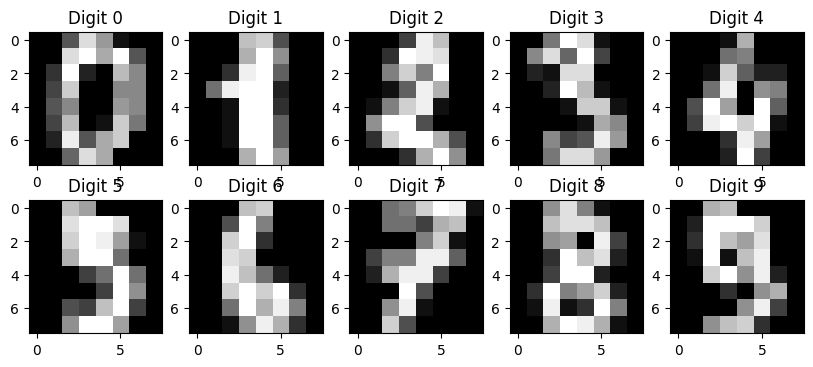

Number of samples: 1797
Number of features: 64
Number of classes: 10


In [13]:
# Display the first few images in the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit {digits.target[i]}")

plt.show()

# Get basic information about the dataset
print(f"Number of samples: {len(digits.images)}")
print(f"Number of features: {len(digits.images[0].ravel())}")
print(f"Number of classes: {len(set(digits.target))}")

In [19]:
# 3. Creating a DataFrame

# Concatenate the features and target variable
df = pd.concat([pd.DataFrame(digits.data), pd.DataFrame(digits.target, columns=['target'])], axis=1)

# Display the first few rows of the concatenated DataFrame
print(df.head())

"""
First 64 Columns: Pixel value of an 8x8 image, flattened into a 64-dimensional vector.
Last "Target" Column: The actual digit corresponding to each digit image.
First 5 rows/images are shown below.
"""

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


'\nFirst 64 Columns: Pixel value of an 8x8 image, flattened into a 64-dimensional vector.\nLast "Target" Column: The actual digit corresponding to each digit image.\nFirst 5 rows/images are shown below.\n'

In [20]:
# 4. Splitting the Data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42, shuffle=True)

"""
Parameters:
- `x` (e.g. digits.data): Input data/features (e.g. Pandas DataFrame) you want to split
- `y` (e.g digits.target): Target variable/lavels (e.g. Pandas Series or NumPy array) corresponding to the input data `x`
- `test_size`: For float, it represents the proportion the dataset to include in the test split (e.g. `0.2` = 20% of data is for testing).
- `train_size`: For float, it represents the proportion the dataset to include in the train split
- Note: if either `test_size` or `train_size` is empty, it will match the other one.
- `random_state`: An int for a reproducible output across multiple function calls (e.g. `random_state=42`)
- `shuffle`: Shuffling recommended to ensure train and test sets are representative of the overall distribution.
- `stratify`: Split in a stratified fashion, using this as the class labels. (Train and test sets have a similar distribution or class labels, partiulary in classification problems).
"""

'\nParameters:\n- `x` (e.g. digits.data): Input data/features (e.g. Pandas DataFrame) you want to split\n- `y` (e.g digits.target): Target variable/lavels (e.g. Pandas Series or NumPy array) corresponding to the input data `x`\n- `test_size`: For float, it represents the proportion the dataset to include in the test split (e.g. `0.2` = 20% of data is for testing).\n- `train_size`: For float, it represents the proportion the dataset to include in the train split\n- Note: if either `test_size` or `train_size` is empty, it will match the other one.\n- `random_state`: An int for a reproducible output across multiple function calls (e.g. `random_state=42`)\n- `shuffle`: Shuffling recommended to ensure train and test sets are representative of the overall distribution.\n- `stratify`: Split in a stratified fashion, using this as the class labels. (Train and test sets have a similar distribution or class labels, partiulary in classification problems).\n'

In [21]:
# 5. Initializing the Model

# Initialize the logistic regression model
model = LogisticRegression(max_iter=10000)

"""
`max_iter`: maximum number of iterations for optimization algorithms (e.g. for time for convergence and for performance).
"""

'\n`max_iter`: maximum number of iterations for optimization algorithms (e.g. for time for convergence and for performance).\n'

In [22]:
# 6. Training the Model

# Train the logistic regression model
model.fit(X_train, y_train)

"""
Goal: Train using `X_train` (inputs) to minimize the error in predicing `y_train` (target variable) with `model.fit`
"""

'\nGoal: Train using `X_train` (inputs) to minimize the error in predicing `y_train` (target variable) with `model.fit`\n'

In [ ]:
# 7. Making Predictions

# Make predictions on the test set
y_pred = model.predict(X_test)

"""
Goal: Generate new predictions with `X_test` (testing inputs) and trained model after `model.fit`
"""

In [ ]:
# 8. Evaluating the Mode

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

"""
Goal: Compare `y_pred` (new predictions) with `y_test` (actual targets)
"""

Accuracy: 0.9722222222222222


Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


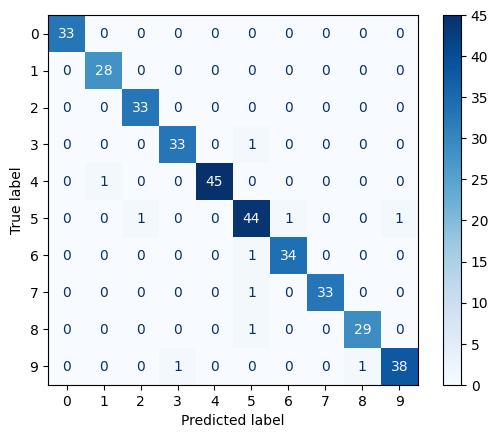

In [ ]:
# A. Confusion Matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

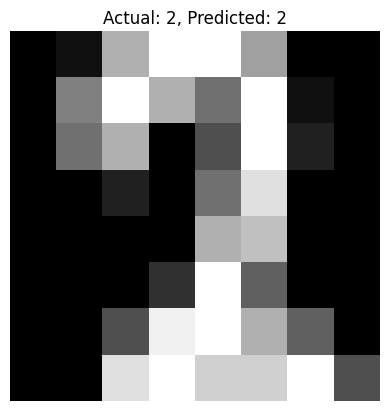

In [23]:
# B. Testing the Model (Random Sample)

# Randomly select a sample
random_index = np.random.randint(0, len(digits.data))
sample_data = digits.data[random_index]
sample_target = digits.target[random_index]

# Reshape the sample data as required by the model for a single prediction
sample_data_reshaped = sample_data.reshape(1, -1)

# Predict the digit using the trained model
predicted_digit = model.predict(sample_data_reshaped)

# Reshape the sample for visualization
sample_image = sample_data.reshape(8, 8)

# Plot the digit
plt.imshow(sample_image, cmap='gray')
plt.title(f'Actual: {sample_target}, Predicted: {predicted_digit[0]}')
plt.axis('off')
plt.show()